# Armado TIENDAS_CABA

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

# Leer csv
df_tiendas = pd.read_csv('/content/drive/MyDrive/customers_ar.csv')
provincia = gpd.read_file('/content/drive/MyDrive/provincia.shp')

Mounted at /content/drive


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
provincia = gpd.read_file('/content/drive/MyDrive/provincia.shp')

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# 1. Filtrar las provincias de CABA
prov_caba = provincia[provincia['nam'].isin(['Ciudad Autónoma de Buenos Aires'])]

# 2. Convertir las tiendas a un GeoDataFrame usando lat y lon
df_tiendas['geometry'] = df_tiendas.apply(lambda row: Point(row['lon'], row['lat']), axis=1)
gdf_tiendas = gpd.GeoDataFrame(df_tiendas, geometry='geometry', crs=prov_caba.crs)

# 3. Realizar un filtro espacial (join)
tiendas_caba = gpd.sjoin(gdf_tiendas, prov_caba, how='inner', op='within')

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
# tiendas_caba tiene crs epsg=4326

# Estaciones de servicio CABA

In [ ]:
df_estaciones_servicio = pd.read_csv('/content/drive/MyDrive/estaciones_servicio_caba.csv')

In [ ]:
df_estaciones_servicio.rename(columns={'long': 'lon'}, inplace=True)

In [ ]:
# Convertir estaciones de servicio a GeoDataFrame
gdf_estaciones_servicio = gpd.GeoDataFrame(
    df_estaciones_servicio,
    geometry=gpd.points_from_xy(df_estaciones_servicio['lon'], df_estaciones_servicio['lat']),
    crs='EPSG:4326'
)

In [ ]:
# 2. Reproyectar a un CRS métrico para calcular distancias en metros
tiendas_caba_metros = tiendas_caba.to_crs(epsg=3857)
gdf_estaciones_servicio_metros = gdf_estaciones_servicio.to_crs(epsg=3857)

# 3. Crear un buffer de 200 metros alrededor de cada tienda (aproximadamente dos cuadras)
tiendas_caba_metros['buffer'] = tiendas_caba_metros.geometry.buffer(200)
tiendas_caba_metros = tiendas_caba_metros.set_geometry('buffer')

# 4. Hacer un spatial join para contar cuántas estaciones están dentro del buffer
gdf_join = gpd.sjoin(gdf_estaciones_servicio_metros, tiendas_caba_metros[['geometry', 'buffer']], how='left', op='within')

# 5. Contar cuántas estaciones caen dentro del buffer para cada tienda
tiendas_caba['estaciones_servicio_200mts'] = gdf_join.groupby(gdf_join.index_right).size()

# Reemplazar NaN por 0 en caso de que no haya estaciones en el buffer de alguna tienda
tiendas_caba['estaciones_servicio_200mts'] = tiendas_caba['estaciones_servicio_200mts'].fillna(0)

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
tiendas_caba["estaciones_servicio_200mts"].mean()

0.13037664363717405

In [ ]:
#1000 metros

# 2. Reproyectar a un CRS métrico para calcular distancias en metros
tiendas_caba_metros = tiendas_caba.to_crs(epsg=3857)

# 3. Crear un buffer de 1000 metros alrededor de cada tienda (aproximadamente diez cuadras)
tiendas_caba_metros['buffer'] = tiendas_caba_metros.geometry.buffer(1000)
tiendas_caba_metros = tiendas_caba_metros.set_geometry('buffer')

# 4. Hacer un spatial join para contar cuántas estaciones están dentro del buffer
gdf_join = gpd.sjoin(gdf_estaciones_servicio_metros, tiendas_caba_metros[['geometry', 'buffer']], how='left', op='within')

# 5. Contar cuántas estaciones caen dentro del buffer para cada tienda
tiendas_caba['estaciones_servicio_1000mts'] = gdf_join.groupby(gdf_join.index_right).size()

# Reemplazar NaN por 0 en caso de que no haya estaciones en el buffer de alguna tienda
tiendas_caba['estaciones_servicio_1000mts'] = tiendas_caba['estaciones_servicio_1000mts'].fillna(0)

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
tiendas_caba["estaciones_servicio_1000mts"].mean()

2.8477824827278804

In [ ]:
# GeoDataFrames en el mismo CRS (usando EPSG:4326)
prov_caba = prov_caba.to_crs(epsg=4326)

# Crear la figura y el axis para el mapa
fig, ax = plt.subplots(figsize=(10, 10))

prov_caba.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.3, label='CABA')

# Graficar las tiendas con puntos azules
tiendas_caba.plot(ax=ax, marker='o', color='lightblue', markersize=10, label='Tiendas')

# Graficar las estaciones de servicio con puntos rojos
gdf_estaciones_servicio.plot(ax=ax, marker='o', color='red', markersize=10, label='Estaciones de Servicio')

# Añadir título y leyenda
plt.title('Tiendas y Estaciones de Servicio en CABA')
plt.legend()

# Mostrar el gráfico
plt.show()

# Subtes

In [ ]:
df_subtes = pd.read_csv('/content/drive/MyDrive/estaciones-de-subte.csv')
df_subtes.rename(columns={'long': 'lon'}, inplace=True)
# Convertir estaciones de servicio a GeoDataFrame
gdf_subtes = gpd.GeoDataFrame(
    df_subtes,
    geometry=gpd.points_from_xy(df_subtes['lon'], df_subtes['lat']),
    crs='EPSG:4326'
)

In [ ]:
# 2. Reproyectar a un CRS métrico para calcular distancias en metros
tiendas_caba_metros = tiendas_caba.to_crs(epsg=3857)
gdf_subtes_metros = gdf_subtes.to_crs(epsg=3857)

# 3. Crear un buffer de 200 metros alrededor de cada tienda (aproximadamente dos cuadras)
tiendas_caba_metros['buffer'] = tiendas_caba_metros.geometry.buffer(200)
tiendas_caba_metros = tiendas_caba_metros.set_geometry('buffer')

# 4. Hacer un spatial join para contar cuántas estaciones están dentro del buffer
gdf_join = gpd.sjoin(gdf_subtes_metros, tiendas_caba_metros[['geometry', 'buffer']], how='left', op='within')

# 5. Contar cuántas estaciones caen dentro del buffer para cada tienda
tiendas_caba['subtes_200mts'] = gdf_join.groupby(gdf_join.index_right).size()

# Reemplazar NaN por 0 en caso de que no haya estaciones en el buffer de alguna tienda
tiendas_caba['subtes_200mts'] = tiendas_caba['subtes_200mts'].fillna(0)

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
tiendas_caba["subtes_200mts"].mean()

0.10519277913973701

In [ ]:
# 2. Reproyectar a un CRS métrico para calcular distancias en metros
tiendas_caba_metros = tiendas_caba.to_crs(epsg=3857)
gdf_subtes_metros = gdf_subtes.to_crs(epsg=3857)

# 3. Crear un buffer de 200 metros alrededor de cada tienda (aproximadamente dos cuadras)
tiendas_caba_metros['buffer'] = tiendas_caba_metros.geometry.buffer(1000)
tiendas_caba_metros = tiendas_caba_metros.set_geometry('buffer')

# 4. Hacer un spatial join para contar cuántas estaciones están dentro del buffer
gdf_join = gpd.sjoin(gdf_subtes_metros, tiendas_caba_metros[['geometry', 'buffer']], how='left', op='within')

# 5. Contar cuántas estaciones caen dentro del buffer para cada tienda
tiendas_caba['subtes_1000mts'] = gdf_join.groupby(gdf_join.index_right).size()

# Reemplazar NaN por 0 en caso de que no haya estaciones en el buffer de alguna tienda
tiendas_caba['subtes_1000mts'] = tiendas_caba['subtes_1000mts'].fillna(0)

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
tiendas_caba["subtes_1000mts"].mean()

2.006685981724983

In [ ]:
prov_caba = prov_caba.to_crs(epsg=4326)

# Crear la figura y el axis para el mapa
fig, ax = plt.subplots(figsize=(10, 10))

prov_caba.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5, label='CABA y Buenos Aires')
tiendas_caba.plot(ax=ax, marker='o', color='lightblue', markersize=10, label='Tiendas')
gdf_subtes.plot(ax=ax, marker='o', color='red', markersize=10, label='Subtes')

plt.title('Tiendas y Subtes en CABA')
plt.legend()
plt.show()

# Radio Censal

In [ ]:
df_radio_censal = pd.read_csv('/content/drive/MyDrive/informacion-censal-por-radio-2010.csv')


In [ ]:
import geopandas as gpd
from shapely import wkt
# Convertir la columna 'WKT' en geometrías
df_radio_censal['geometry'] = df_radio_censal['WKT'].apply(wkt.loads)

# Crear el GeoDataFrame, especificando el sistema de coordenadas (CRS)
gdf_radio_censal = gpd.GeoDataFrame(df_radio_censal, geometry='geometry')

# Asignar el CRS (suponiendo que las coordenadas estén en EPSG:4326 - WGS84)
gdf_radio_censal.set_crs(epsg=4326, inplace=True)

,WKT,ID,CO_FRAC_RA,COMUNA,FRACCION,RADIO,TOTAL_POB,T_VARON,T_MUJER,T_VIVIENDA,V_PARTICUL,V_COLECTIV,T_HOGAR,H_CON_NBI,H_SIN_NBI,geometry
0,MULTIPOLYGON (((-58.372489764082 -34.591546570...,1,1_1_1,1,1,1,336,212,124,82,80,2,65,19,46,"MULTIPOLYGON (((-58.37249 -34.59155, -58.37261..."
1,MULTIPOLYGON (((-58.3865223305709 -34.60399309...,2,1_12_1,1,12,1,341,184,157,365,361,4,116,25,91,"MULTIPOLYGON (((-58.38652 -34.60399, -58.38634..."
2,MULTIPOLYGON (((-58.3793832787935 -34.60483817...,3,1_12_10,1,12,10,296,162,134,629,627,2,101,1,100,"MULTIPOLYGON (((-58.37938 -34.60484, -58.37801..."
3,MULTIPOLYGON (((-58.3679211414675 -34.60517426...,4,1_12_11,1,12,11,528,294,234,375,370,5,136,7,129,"MULTIPOLYGON (((-58.36792 -34.60517, -58.36772..."
4,MULTIPOLYGON (((-58.3851326494337 -34.60391158...,5,1_12_2,1,12,2,229,101,128,445,445,0,129,16,113,"MULTIPOLYGON (((-58.38513 -34.60391, -58.38371..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,MULTIPOLYGON (((-58.3821175493669 -34.58429918...,3550,1_3_12,1,3,12,561,269,292,170,170,0,181,70,111,"MULTIPOLYGON (((-58.38212 -34.58430, -58.38125..."
3550,MULTIPOLYGON (((-58.3811903214861 -34.58482573...,3551,1_3_11,1,3,11,745,377,368,223,223,0,267,95,172,"MULTIPOLYGON (((-58.38119 -34.58483, -58.38002..."
3551,MULTIPOLYGON (((-58.3808613781611 -34.58431132...,3552,1_3_10,1,3,10,745,367,378,261,261,0,261,86,175,"MULTIPOLYGON (((-58.38086 -34.58431, -58.38047..."
3552,MULTIPOLYGON (((-58.4353204006853 -34.64905180...,3553,7_18_11,7,18,11,1325,685,640,223,223,0,403,143,260,"MULTIPOLYGON (((-58.43532 -34.64905, -58.43496..."


In [ ]:
# Graficar el GeoDataFrame
gdf_radio_censal.plot(figsize=(6,6))
plt.show()

In [ ]:
gdf_radio_censal.columns

Index(['WKT', 'ID', 'CO_FRAC_RA', 'COMUNA', 'FRACCION', 'RADIO', 'TOTAL_POB',
       'T_VARON', 'T_MUJER', 'T_VIVIENDA', 'V_PARTICUL', 'V_COLECTIV',
       'T_HOGAR', 'H_CON_NBI', 'H_SIN_NBI', 'geometry'],
      dtype='object')

In [ ]:
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar los radios censales (polígonos)
gdf_radio_censal.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5)

# Graficar las tiendas (puntos)
tiendas_caba.plot(ax=ax, color='blue', marker='o', markersize=5, label='Tiendas')

# Agregar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

TOTAL_POB: Total de la población en ese radio censal.

T_VARON: Total de varones (hombres) en ese radio censal.

T_MUJER: Total de mujeres en ese radio censal.

T_VIVIENDA: Total de viviendas en ese radio censal.

V_PARTICUL: Total de viviendas particulares (viviendas familiares, no colectivas).

V_COLECTIV: Total de viviendas colectivas (por ejemplo, residencias o albergues).

T_HOGAR: Total de hogares en el radio censal.

H_CON_NBI: Hogares con Necesidades Básicas Insatisfechas (NBI), un indicador de pobreza.

H_SIN_NBI: Hogares sin Necesidades Básicas Insatisfechas, es decir, hogares que no presentan indicadores de pobreza.

In [ ]:
# Función para asignar el ID del radio censal
def asignar_radio(tienda, gdf_radio_censal):
    for _, radio in gdf_radio_censal.iterrows():
        if tienda.within(radio['geometry']):
            return radio['ID']  # Retornar el ID del radio censal
    return None  # Si no está dentro de ningún radio

# Aplicar la función a cada tienda
tiendas_caba['id_rc'] = tiendas_caba['geometry'].apply(lambda x: asignar_radio(x, gdf_radio_censal))


In [ ]:
tiendas_caba = tiendas_caba[['id',
                             "lat",
                             "lon",
                             'geometry',
                             "estaciones_servicio_200mts",
                             "estaciones_servicio_1000mts",
                             "subtes_200mts",
                             "subtes_1000mts",
                             "id_rc"]]

In [ ]:
tiendas_caba.columns

Index(['id', 'lat', 'lon', 'geometry', 'estaciones_servicio_200mts',
       'estaciones_servicio_1000mts', 'subtes_200mts', 'subtes_1000mts',
       'id_rc'],
      dtype='object')

In [ ]:
gdf_radio_censal.columns

Index(['WKT', 'ID', 'CO_FRAC_RA', 'COMUNA', 'FRACCION', 'RADIO', 'TOTAL_POB',
       'T_VARON', 'T_MUJER', 'T_VIVIENDA', 'V_PARTICUL', 'V_COLECTIV',
       'T_HOGAR', 'H_CON_NBI', 'H_SIN_NBI', 'geometry'],
      dtype='object')

In [ ]:
gdf_radio_censal["TOTAL_POB"].mean()

813.210748452448

In [ ]:
gdf_radio_censal["T_HOGAR"].mean()

323.6167698368036

Calculo de Nivel Socioeconómico

In [ ]:
# Calcular el porcentaje de hogares con NBI
gdf_radio_censal['porc_nbi'] = (gdf_radio_censal['H_CON_NBI'] / gdf_radio_censal['T_HOGAR'])

En este caso un porcentaje alto implica menor NSE

In [ ]:
import matplotlib.pyplot as plt

# Crear el gráfico
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# Graficar los radios censales coloreados por 'porc_nbi' y remarcar los bordes
gdf_radio_censal.plot(column='porc_nbi', ax=ax, legend=True,
                      cmap='YlGnBu',
                      legend_kwds={'label': "Porcentaje de hogares con NBI",
                                   'orientation': "vertical"},
                      edgecolor='black',
                      linewidth=0.5)

plt.title('Distribución del Porcentaje de Hogares con NBI por Radio Censal', fontsize=15)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Crear el gráfico
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# Graficar los radios censales coloreados por 'porc_nbi' y remarcar los bordes
gdf_radio_censal.plot(column='porc_nbi', ax=ax, legend=True,
                      cmap='YlGnBu',
                      legend_kwds={'label': "Porcentaje de hogares con NBI",
                                   'orientation': "vertical"},
                      edgecolor='black',
                      linewidth=0.5)

tiendas_caba.plot(ax=ax, marker='o', color='blue', markersize=5, label='Tiendas')
plt.title('Distribución del Porcentaje de Hogares con NBI y Tiendas', fontsize=15)
plt.legend()
plt.show()


In [ ]:
# Calcular cantidad de personas por vivienda
gdf_radio_censal['hacinamiento'] = (gdf_radio_censal['TOTAL_POB'] / gdf_radio_censal['T_HOGAR'])

Igualmente, un porcentaje alto implica menor NSE

In [ ]:
import matplotlib.pyplot as plt

# Crear el gráfico
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# Graficar los radios censales coloreados por 'hacinamiento' y remarcar los bordes
gdf_radio_censal.plot(column='hacinamiento', ax=ax, legend=True,
                      cmap='YlGnBu',
                      legend_kwds={'label': "Personas por vivienda",
                                   'orientation': "vertical"},
                      edgecolor='black',
                      linewidth=0.5)

plt.title('Personas por vivienda por Radio Censal', fontsize=15)
plt.show()

Calcular el AREA del RC

In [ ]:
# Calcular el área de cada radio censal en metros cuadrados (si tus geometrías están en ese sistema de coordenadas)
gdf_radio_censal['area_radio'] = gdf_radio_censal['geometry'].area

<ipython-input-27-3fa2eb13bd64>:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_radio_censal['area_radio'] = gdf_radio_censal['geometry'].area


Densidad de población = personas por metro cuadrado

In [ ]:
# Calcular la densidad de población por radio censal
gdf_radio_censal['densidad_pob'] = gdf_radio_censal['TOTAL_POB'] / gdf_radio_censal['area_radio']

In [ ]:
import matplotlib.pyplot as plt

# Crear el gráfico
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# Graficar los radios censales coloreados por 'densidad_pob' y remarcar los bordes
gdf_radio_censal.plot(column='densidad_pob', ax=ax, legend=True,
                      cmap='YlGnBu',
                      legend_kwds={'label': "Personas por metro cuadrado",
                                   'orientation': "vertical"},
                      edgecolor='black',
                      linewidth=0.5)

plt.title('Densidad de población por radio censal', fontsize=15)
plt.show()

Porcentaje de mujeres

In [ ]:
# Calcular el porcentaje de mujeres
gdf_radio_censal['porc_mujeres'] = gdf_radio_censal['T_MUJER'] / gdf_radio_censal['TOTAL_POB']

Porcentaje de varones

In [ ]:
# Calcular el porcentaje de varones
gdf_radio_censal['porc_varones'] = gdf_radio_censal['T_VARON'] / gdf_radio_censal['TOTAL_POB']

In [ ]:
# Seleccionar las columnas que quieres transferir del gdf_radio_censal
columnas_a_transferir = ['ID', 'porc_nbi', 'hacinamiento', 'densidad_pob', 'porc_mujeres', 'porc_varones']

# Renombrar la columna ID en gdf_radio_censal para que coincida con id_rc en tiendas_caba
gdf_radio_censal_renamed = gdf_radio_censal[columnas_a_transferir].rename(columns={'ID': 'id_rc'})

# Hacer el merge entre tiendas_caba y gdf_radio_censal_renamed basado en id_rc
tiendas_caba = tiendas_caba.merge(gdf_radio_censal_renamed, on='id_rc', how='left')

In [ ]:
tiendas_caba.columns

Index(['id', 'lat', 'lon', 'geometry', 'estaciones_servicio_200mts',
       'estaciones_servicio_1000mts', 'subtes_200mts', 'subtes_1000mts',
       'id_rc', 'porc_nbi', 'hacinamiento', 'densidad_pob', 'porc_mujeres',
       'porc_varones'],
      dtype='object')

# Flujo Vehicular

In [ ]:
import chardet

# Detectar la codificación del archivo
with open('/content/drive/MyDrive/transito_julio_2024.csv', 'rb') as file:
    raw_data = file.read()
    result = chardet.detect(raw_data)
    encoding = result['encoding']

In [ ]:
encoding

'ISO-8859-1'

In [ ]:
# Leer el archivo con la codificación detectada
df_flujo_vehicular = pd.read_csv('/content/drive/MyDrive/transito_julio_2024.csv', encoding=encoding, sep=";")

<ipython-input-130-418873ba3c32>:2: DtypeWarning: Columns (0,1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_flujo_vehicular = pd.read_csv('/content/drive/MyDrive/transito_julio_2024.csv', encoding=encoding, sep=";")


In [ ]:
df_flujo_vehicular

,"Mes, Día, Año de Fecha Operativa",Hora HH,Cat Cobrada,ID Peaje,Observacion,Sentido,Tipo Cobro,Pasos,Unnamed: 8
0,1/7/2024,0,Auto,ALB,Mercado Pago,Centro,Mercado Pago,5.0,NaN
1,1/7/2024,0,Auto,ALB,Mercado Pago,Provincia,Mercado Pago,3.0,NaN
2,1/7/2024,0,Auto,ALB,Mercado Pago OCR,Centro,Mercado Pago,3.0,NaN
3,1/7/2024,0,Auto,ALB,Mercado Pago OCR,Provincia,Mercado Pago,1.0,NaN
4,1/7/2024,0,Auto,ALB,Tag - PosPago,Centro,Tag,36.0,NaN
...,...,...,...,...,...,...,...,...,...
279634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
279635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
279636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
279637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Creeria que esta info no nos sirve demasiado

# Universidades

In [ ]:
df_universidades = pd.read_csv('/content/drive/MyDrive/universidades.csv')
df_universidades.rename(columns={'long': 'lon'}, inplace=True)
# Convertir a GeoDataFrame
gdf_universidades = gpd.GeoDataFrame(
    df_universidades,
    geometry=gpd.points_from_xy(df_universidades['lon'], df_universidades['lat']),
    crs='EPSG:4326'
)

In [ ]:
gdf_universidades = gdf_universidades.drop_duplicates(subset='geometry')

In [ ]:
gdf_universidades["regimen"].unique()

array(['Privado', 'Público'], dtype=object)

In [ ]:
import geopandas as gpd

# 1. Reproyectar a un CRS métrico para calcular distancias en metros
tiendas_caba_metros = tiendas_caba.to_crs(epsg=3857)
gdf_universidades_metros = gdf_universidades.to_crs(epsg=3857)

# 2. Crear un buffer de 200 metros alrededor de cada tienda
tiendas_caba_metros['buffer'] = tiendas_caba_metros.geometry.buffer(200)
tiendas_caba_metros = tiendas_caba_metros.set_geometry('buffer')

# 3. Contar universidades privadas dentro del buffer
gdf_uni_privadas = gdf_universidades_metros[gdf_universidades_metros['regimen'] == 'Privado']
gdf_join_privadas = gpd.sjoin(gdf_uni_privadas, tiendas_caba_metros[['geometry', 'buffer']], how='left', op='within')
tiendas_caba_metros['uni_privada_200mts'] = gdf_join_privadas.groupby(gdf_join_privadas.index_right).size()

# 4. Contar universidades públicas dentro del buffer
gdf_uni_publicas = gdf_universidades_metros[gdf_universidades_metros['regimen'] == 'Público']
gdf_join_publicas = gpd.sjoin(gdf_uni_publicas, tiendas_caba_metros[['geometry', 'buffer']], how='left', op='within')
tiendas_caba_metros['uni_publica_200mts'] = gdf_join_publicas.groupby(gdf_join_publicas.index_right).size()

# 5. Reemplazar NaN por 0 en caso de que no haya universidades en el buffer de alguna tienda
tiendas_caba['uni_privada_200mts'] = tiendas_caba_metros['uni_privada_200mts'].fillna(0)
tiendas_caba['uni_publica_200mts'] = tiendas_caba_metros['uni_publica_200mts'].fillna(0)


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
tiendas_caba["uni_privada_200mts"].mean()

0.08268330733229329

In [ ]:
tiendas_caba["uni_publica_200mts"].mean()

0.036550033429908625

In [ ]:
# 1. Reproyectar a un CRS métrico para calcular distancias en metros
tiendas_caba_metros = tiendas_caba.to_crs(epsg=3857)
gdf_universidades_metros = gdf_universidades.to_crs(epsg=3857)

# 2. Crear un buffer de 1000 metros alrededor de cada tienda
tiendas_caba_metros['buffer'] = tiendas_caba_metros.geometry.buffer(1000)
tiendas_caba_metros = tiendas_caba_metros.set_geometry('buffer')

# 3. Contar universidades privadas dentro del buffer
gdf_uni_privadas = gdf_universidades_metros[gdf_universidades_metros['regimen'] == 'Privado']
gdf_join_privadas = gpd.sjoin(gdf_uni_privadas, tiendas_caba_metros[['geometry', 'buffer']], how='left', op='within')
tiendas_caba_metros['uni_privada_1000mts'] = gdf_join_privadas.groupby(gdf_join_privadas.index_right).size()

# 4. Contar universidades públicas dentro del buffer
gdf_uni_publicas = gdf_universidades_metros[gdf_universidades_metros['regimen'] == 'Público']
gdf_join_publicas = gpd.sjoin(gdf_uni_publicas, tiendas_caba_metros[['geometry', 'buffer']], how='left', op='within')
tiendas_caba_metros['uni_publica_1000mts'] = gdf_join_publicas.groupby(gdf_join_publicas.index_right).size()

# 5. Reemplazar NaN por 0 en caso de que no haya universidades en el buffer de alguna tienda
tiendas_caba['uni_privada_1000mts'] = tiendas_caba_metros['uni_privada_1000mts'].fillna(0)
tiendas_caba['uni_publica_1000mts'] = tiendas_caba_metros['uni_publica_1000mts'].fillna(0)


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
tiendas_caba['uni_privada_1000mts'].mean()

2.0309783819924228

In [ ]:
tiendas_caba['uni_publica_1000mts'].mean()

0.9362603075551593

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd

prov_caba = prov_caba.to_crs(epsg=4326)
tiendas_caba = tiendas_caba.to_crs(epsg=4326)
gdf_universidades = gdf_universidades.to_crs(epsg=4326)

universidades_publicas = gdf_universidades[gdf_universidades['regimen'] == 'Público']
universidades_privadas = gdf_universidades[gdf_universidades['regimen'] == 'Privado']

fig, ax = plt.subplots(figsize=(10, 10))

prov_caba.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5, label='CABA y Buenos Aires')
tiendas_caba.plot(ax=ax, marker='o', color='lightblue', markersize=10, label='Tiendas',alpha=0.8)
universidades_publicas.plot(ax=ax, marker='o', color='red', markersize=10, label='Universidades Públicas')
universidades_privadas.plot(ax=ax, marker='o', color='green', markersize=10, label='Universidades Privadas')

plt.title('Tiendas y Universidades en CABA')
plt.legend()
plt.show()


# Estadios

In [ ]:
df_estadios = pd.read_csv('/content/drive/MyDrive/estadios.csv')
df_estadios.rename(columns={'long': 'lon'}, inplace=True)
# Convertir a GeoDataFrame
gdf_estadios = gpd.GeoDataFrame(
    df_estadios,
    geometry=gpd.points_from_xy(df_estadios['lon'], df_estadios['lat']),
    crs='EPSG:4326'
)

In [ ]:
gdf_estadios.columns

Index(['lon', 'lat', 'id', 'club', 'estadio', 'web', 'facebook', 'twitter',
       'contacto', 'objeto', 'calle', 'altura', 'barrio', 'comuna',
       'codigo_postal', 'codigo_postal_argentino', 'geometry'],
      dtype='object')

In [ ]:
# 2. Reproyectar a un CRS métrico para calcular distancias en metros
tiendas_caba_metros = tiendas_caba.to_crs(epsg=3857)
gdf_estadios_metros = gdf_estadios.to_crs(epsg=3857)

# 3. Crear un buffer de 200 metros alrededor de cada tienda (aproximadamente dos cuadras)
tiendas_caba_metros['buffer'] = tiendas_caba_metros.geometry.buffer(200)
tiendas_caba_metros = tiendas_caba_metros.set_geometry('buffer')

# 4. Hacer un spatial join para contar cuántas estaciones están dentro del buffer
gdf_join = gpd.sjoin(gdf_estadios_metros, tiendas_caba_metros[['geometry', 'buffer']], how='left', op='within')

# 5. Contar cuántas estaciones caen dentro del buffer para cada tienda
tiendas_caba['estadios_200mts'] = gdf_join.groupby(gdf_join.index_right).size()

# Reemplazar NaN por 0 en caso de que no haya estaciones en el buffer de alguna tienda
tiendas_caba['estadios_200mts'] = tiendas_caba['estadios_200mts'].fillna(0)

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
tiendas_caba['estadios_200mts'].mean()

0.005348785379986628

In [ ]:
# 2. Reproyectar a un CRS métrico para calcular distancias en metros
tiendas_caba_metros = tiendas_caba.to_crs(epsg=3857)
gdf_estadios_metros = gdf_estadios.to_crs(epsg=3857)

# 3. Crear un buffer de 200 metros alrededor de cada tienda (aproximadamente dos cuadras)
tiendas_caba_metros['buffer'] = tiendas_caba_metros.geometry.buffer(1000)
tiendas_caba_metros = tiendas_caba_metros.set_geometry('buffer')

# 4. Hacer un spatial join para contar cuántas estaciones están dentro del buffer
gdf_join = gpd.sjoin(gdf_estadios_metros, tiendas_caba_metros[['geometry', 'buffer']], how='left', op='within')

# 5. Contar cuántas estaciones caen dentro del buffer para cada tienda
tiendas_caba['estadios_1000mts'] = gdf_join.groupby(gdf_join.index_right).size()

# Reemplazar NaN por 0 en caso de que no haya estaciones en el buffer de alguna tienda
tiendas_caba['estadios_1000mts'] = tiendas_caba['estadios_1000mts'].fillna(0)

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
tiendas_caba['estadios_1000mts'].mean()

0.1918876755070203

In [ ]:
# Gráfico
prov_caba = prov_caba.to_crs(epsg=4326)

# Crear la figura y el axis para el mapa
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar los polígonos de CABA
prov_caba.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.3, label='CABA')

# Graficar las tiendas con puntos azules
tiendas_caba.plot(ax=ax, marker='o', color='lightblue', markersize=10, label='Tiendas')

# Graficar con puntos rojos
gdf_estadios.plot(ax=ax, marker='o', color='red', markersize=10, label='Estadios')

# Añadir título y leyenda
plt.title('Tiendas y Estadios en CABA')
plt.legend()

# Mostrar el gráfico
plt.show()

In [ ]:
import geopandas as gpd
tiendas_caba_metros = tiendas_caba.to_crs(epsg=3857)
gdf_estadios_metros = gdf_estadios.to_crs(epsg=3857)

# 2. Crear un buffer de 1500 metros alrededor de cada tienda
tiendas_caba_metros['buffer'] = tiendas_caba_metros.geometry.buffer(1500)
tiendas_caba_metros = tiendas_caba_metros.set_geometry('buffer')

# 3. Filtrar estadios de River Plate y Boca Juniors
gdf_estadios_river = gdf_estadios_metros[gdf_estadios_metros['club'] == 'Club Atletico River Plate']
gdf_estadios_boca = gdf_estadios_metros[gdf_estadios_metros['club'] == 'Club Atlético Boca Juniors']

# 4. Realizar un spatial join para el estadio de River Plate
gdf_join_river = gpd.sjoin(gdf_estadios_river, tiendas_caba_metros[['geometry', 'buffer']], how='left', op='within')

# Crear la variable river_1500mts
tiendas_caba['river_1500mts'] = gdf_join_river.groupby(gdf_join_river.index_right).size().reindex(tiendas_caba_metros.index, fill_value=0)
tiendas_caba['river_1500mts'] = (tiendas_caba['river_1500mts'] > 0).astype(int)

# 5. Realizar un spatial join para el estadio de Boca Juniors
gdf_join_boca = gpd.sjoin(gdf_estadios_boca, tiendas_caba_metros[['geometry', 'buffer']], how='left', op='within')

# Crear la variable boca_1500mts
tiendas_caba['boca_1500mts'] = gdf_join_boca.groupby(gdf_join_boca.index_right).size().reindex(tiendas_caba_metros.index, fill_value=0)
tiendas_caba['boca_1500mts'] = (tiendas_caba['boca_1500mts'] > 0).astype(int)



/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


# Clubes

In [ ]:
import pandas as pd
import geopandas as gpd

df_clubes = pd.read_csv('/content/drive/MyDrive/clubes.csv')
df_clubes.rename(columns={'long': 'lon'}, inplace=True)

df_clubes['lon'] = pd.to_numeric(df_clubes['lon'], errors='coerce')
df_clubes['lat'] = pd.to_numeric(df_clubes['lat'], errors='coerce')
print(df_clubes[['lon', 'lat']].isna().sum())

lon    1
lat    1
dtype: int64


In [ ]:
df_clubes = df_clubes.dropna(subset=['lon', 'lat'])

# Convertir a GeoDataFrame
gdf_clubes = gpd.GeoDataFrame(
    df_clubes,
    geometry=gpd.points_from_xy(df_clubes['lon'], df_clubes['lat']),
    crs='EPSG:4326'
)

In [ ]:
# 2. Reproyectar a un CRS métrico para calcular distancias en metros
tiendas_caba_metros = tiendas_caba.to_crs(epsg=3857)
gdf_clubes_metros = gdf_clubes.to_crs(epsg=3857)

# 3. Crear un buffer de 200 metros alrededor de cada tienda (aproximadamente dos cuadras)
tiendas_caba_metros['buffer'] = tiendas_caba_metros.geometry.buffer(200)
tiendas_caba_metros = tiendas_caba_metros.set_geometry('buffer')

# 4. Hacer un spatial join para contar cuántas estaciones están dentro del buffer
gdf_join = gpd.sjoin(gdf_clubes_metros, tiendas_caba_metros[['geometry', 'buffer']], how='left', op='within')

# 5. Contar cuántas estaciones caen dentro del buffer para cada tienda
tiendas_caba['clubes_200mts'] = gdf_join.groupby(gdf_join.index_right).size()

# Reemplazar NaN por 0 en caso de que no haya estaciones en el buffer de alguna tienda
tiendas_caba['clubes_200mts'] = tiendas_caba['clubes_200mts'].fillna(0)

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
tiendas_caba['clubes_200mts'].mean()

0.1305995096946735

In [ ]:
# 2. Reproyectar a un CRS métrico para calcular distancias en metros
tiendas_caba_metros = tiendas_caba.to_crs(epsg=3857)
gdf_clubes_metros = gdf_clubes.to_crs(epsg=3857)

# 3. Crear un buffer de 1000 metros alrededor de cada tienda
tiendas_caba_metros['buffer'] = tiendas_caba_metros.geometry.buffer(1000)
tiendas_caba_metros = tiendas_caba_metros.set_geometry('buffer')

# 4. Hacer un spatial join para contar cuántas estaciones están dentro del buffer
gdf_join = gpd.sjoin(gdf_clubes_metros, tiendas_caba_metros[['geometry', 'buffer']], how='left', op='within')

# 5. Contar cuántas estaciones caen dentro del buffer para cada tienda
tiendas_caba['clubes_1000mts'] = gdf_join.groupby(gdf_join.index_right).size()

# Reemplazar NaN por 0 en caso de que no haya estaciones en el buffer de alguna tienda
tiendas_caba['clubes_1000mts'] = tiendas_caba['clubes_1000mts'].fillna(0)

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
tiendas_caba['clubes_1000mts'].mean()

3.1297080454646755

In [ ]:
prov_caba = prov_caba.to_crs(epsg=4326)

# Crear la figura y el axis para el mapa
fig, ax = plt.subplots(figsize=(10, 10))

prov_caba.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5, label='CABA')
tiendas_caba.plot(ax=ax, marker='o', color='lightblue', markersize=10, label='Tiendas')
gdf_clubes.plot(ax=ax, marker='o', color='red', markersize=10, label='Clubes')

plt.title('Tiendas y Clubes en CABA')
plt.legend()
plt.show()

# Final

In [ ]:
import pandas as pd

# Convertir la geometría a WKT (Well-Known Text)
#tiendas_caba['geometry'] = tiendas_caba['geometry'].apply(lambda x: x.wkt)

# Guardar el DataFrame como un archivo CSV
tiendas_caba.to_csv('/content/drive/MyDrive/tiendas_caba_def.csv', index=False)


In [ ]:
!ls /content/drive/MyDrive/

# EDA

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

# Leer csv
df_tiendas = pd.read_csv('/content/drive/MyDrive/2024 2Q/Proyecto Final/TP Proyecto/Código/tiendas_caba_v3.csv')

Mounted at /content/drive


In [ ]:
df_tiendas.columns

In [ ]:
# Leer csv
import geopandas as gpd
customers = pd.read_csv('/content/drive/MyDrive/customers_ar.csv')
provincia = gpd.read_file('/content/drive/MyDrive/provincia.shp')
orders = pd.read_csv('/content/drive/MyDrive/orders_ar.csv')

<ipython-input-2-8cd112f9cf95>:5: DtypeWarning: Columns (12,32) have mixed types. Specify dtype option on import or set low_memory=False.
  orders = pd.read_csv('/content/drive/MyDrive/orders_ar.csv')


In [ ]:
# 1. Filtrar las provincias de CABA
prov_caba = provincia[provincia['nam'].isin(['Ciudad Autónoma de Buenos Aires'])]

In [ ]:
orders.columns

Index(['Unnamed: 0', 'id', 'supplier_order_id', 'order_id', 'ship_at',
       'shipped_at', 'supplier_id', 'customer_id', 'canceler',
       'supplier_reason', 'supplier_comment', 'customer_reason',
       'customer_comment', 'total', 'discount_amount', 'created_at',
       'confirmed_at', 'canceled_at', 'updated_at', 'credits_paid',
       'money_paid', 'service_fee', 'discount_id', 'delivery_lat',
       'delivery_lon', 'delivery_cost', 'final_amount', 'formatted_address',
       'customer_type_code', 'additional_info', 'promotions_amount',
       'state_id', 'postal_code'],
      dtype='object')

In [ ]:
# Suponiendo que tu DataFrame se llama 'orders'
df_grouped = orders.groupby('customer_id').agg(
    cantidad_ordenes=('customer_id', 'size'),    # Cuenta la cantidad de órdenes por cliente
    monto_promedio=('final_amount', 'mean')      # Calcula el monto promedio de las órdenes
).reset_index()

In [ ]:
df_grouped

,customer_id,cantidad_ordenes,monto_promedio
0,15,15,18167.628462
1,17,70,15446.260357
2,18,134,7319.049367
3,20,86,16400.069155
4,21,56,12143.823061
...,...,...,...
4630,355153,41,232118.295313
4631,356616,75,87460.205333
4632,356647,83,118225.955970
4633,359221,60,107304.423333


In [ ]:
df_grouped["cantidad_ordenes"].min()

1

In [ ]:
df_grouped["cantidad_ordenes"].max()

836

In [ ]:
df_grouped["cantidad_ordenes"].mean()

30.95641855447681

In [ ]:
df_grouped["cantidad_ordenes"].median()

12.0

In [ ]:
orders["customer_id"]

,customer_id
0,26429
1,33446
2,22941
3,66442
4,135421
...,...
143478,20835
143479,53
143480,2080
143481,217367


In [ ]:
customers["customer_id"]

In [ ]:
# Convertir la columna 'id' en ambos DataFrames a tipo string para asegurar la compatibilidad
df_tiendas['id'] = df_tiendas['id'].astype(str)
customers['id'] = customers['id'].astype(str)

# Realizar el merge
df_tiendas = pd.merge(df_tiendas, customers[['id', 'customer_id']], on='id', how='left')

# Mostrar el DataFrame resultante
print(df_tiendas)

                                                     id        lat        lon  \
0     bytearray(b'-\x07\xc3\xa0g\xf1\x11\xec\x96\xe9... -34.661240 -58.511409   
1     bytearray(b'-\x895Rg\xf3\x11\xec\x96\xe9\x06\x... -34.624407 -58.417899   
2     bytearray(b'-\x91<xg\xf3\x11\xec\x96\xe9\x06\x... -34.574641 -58.447234   
3     bytearray(b'-\xd0\x8fag\xf1\x11\xec\x96\xe9\x0... -34.610076 -58.455903   
4     bytearray(b'-\xe7S\xbfg\xf1\x11\xec\x96\xe9\x0... -34.620644 -58.395803   
...                                                 ...        ...        ...   
1978  bytearray(b"\xc0\x83\xc6\' \x14@\x11\xa0\x1a\x... -34.633944 -58.481373   
1979  bytearray(b"\xe9\xb7}\xac\'\x17CM\x98j\xfd\xba... -34.617626 -58.482228   
1980  bytearray(b"^\xbd<\xdd\x1c\x08N\'\xb3\xbe\xf8\... -34.646063 -58.372359   
1981  bytearray(b"3\xbe\'t\x8f\xf4NM\xb9\x10GL\xb0\x... -34.632435 -58.376240   
1982  bytearray(b"O\x8d\x13\xbd\xbd*J\xff\x9c\xb6\x0... -34.629273 -58.467130   

                           

In [ ]:
# Convertir las columnas 'id' y 'customer_id' a string
df_tiendas['customer_id'] = df_tiendas['customer_id'].astype(str)
df_grouped['customer_id'] = df_grouped['customer_id'].astype(str)

# Hacer el merge
df_final = pd.merge(df_tiendas, df_grouped, left_on='customer_id', right_on='customer_id', how='left')

In [ ]:
df_final.columns

Index(['id', 'lat', 'lon', 'geometry', 'estaciones_servicio_200mts',
       'estaciones_servicio_1000mts', 'subtes_200mts', 'subtes_1000mts',
       'id_rc', 'porc_nbi', 'hacinamiento', 'densidad_pob', 'porc_mujeres',
       'porc_varones', 'uni_privada_200mts', 'uni_publica_200mts',
       'uni_privada_1000mts', 'uni_publica_1000mts', 'estadios_200mts',
       'estadios_1000mts', 'river_1500mts', 'boca_1500mts', 'clubes_200mts',
       'clubes_1000mts', 'tienda_mas_cercana', 'escuelas_cercanas_200m',
       'escuelas_cercanas_1000m', 'paradas_cercanas_200m',
       'paradas_cercanas_1000m', 'everdes_cercanos_200m',
       'everdes_cercanos_1000m', 'hay_bicicleteros_200m',
       'hospitales_cercanos_200m', 'hospitales_cercanos_1000m',
       'distancia_al_hospital_mas_cercano', 'parroquias_cercanas_200m',
       'parroquias_cercanas_1000m', 'comuna', 'negocios_cercanos_200m',
       'negocios_cercanos_1000m', 'tiendas_cercanas_200m',
       'supermercados_200m', 'supermercados_1000m',

In [ ]:
df_final['cantidad_ordenes'].mean()

39.469994957135654

In [ ]:
gdf_final = gpd.GeoDataFrame(
    df_final,
    geometry=gpd.points_from_xy(df_final['lon'], df_final['lat']),
    crs='EPSG:4326'
)

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd

# Crear la figura y el axis para el mapa
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar la capa de la provincia (prov_caba)
prov_caba.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.3, label='CABA')

# Asegurarse de que no haya valores NaN en 'cantidad_ordenes'
gdf_final['cantidad_ordenes'].fillna(0, inplace=True)

# Definir los rangos y colores
rangos = [1, 5, 12, 30, 100, 850]
colores = plt.cm.viridis(np.linspace(0, 1, len(rangos)-1))

# Crear una columna 'rango' para clasificar las tiendas según la cantidad de órdenes
gdf_final['rango'] = pd.cut(gdf_final['cantidad_ordenes'], bins=rangos, labels=False, include_lowest=True)

# Reemplazar NaN en 'rango' por un valor específico, por ejemplo, -1 (si es necesario)
gdf_final['rango'].fillna(-1, inplace=True)

# Asignar colores a cada tienda según su rango, ignorando las filas con rango -1
gdf_final['color'] = gdf_final['rango'].apply(lambda x: colores[int(x)] if x != -1 else 'grey')

# Graficar las tiendas según el rango de cantidad de órdenes
for idx, rango in enumerate(np.unique(gdf_final['rango'])):
    subset = gdf_final[gdf_final['rango'] == rango]
    # Saltar el rango -1 (opcional, si no queremos incluir tiendas sin órdenes)
    if rango == -1:
        continue
    subset.plot(ax=ax, marker='o', color=colores[idx], markersize=30, label=f'{rangos[idx]}-{rangos[idx+1]} órdenes')

# Añadir título y leyenda
plt.title('Tiendas en CABA según la cantidad de órdenes')
plt.legend(title='Cantidad de órdenes')

# Mostrar el gráfico
plt.show()


In [ ]:
gdf_final["monto_promedio"].max()

5.941176470588236e+21

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd

# Crear la figura y el axis para el mapa
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar la capa de la provincia (prov_caba)
prov_caba.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.3, label='CABA')

# Asegurarse de que no haya valores NaN en 'monto_promedio'
gdf_final['monto_promedio'].fillna(0, inplace=True)

# Definir los rangos y colores
# Basado en los datos estadísticos proporcionados
rangos = [0,10000,1000000,10000000,1000000000, 1e+18]  # Ajusta los rangos según tus datos
colores = plt.cm.viridis(np.linspace(0, 1, len(rangos)-1))

# Crear una columna 'rango' para clasificar las tiendas según el monto promedio
gdf_final['rango'] = pd.cut(gdf_final['monto_promedio'], bins=rangos, labels=False, include_lowest=True)

# Reemplazar NaN en 'rango' por un valor específico, por ejemplo, -1 (si es necesario)
gdf_final['rango'].fillna(-1, inplace=True)

# Asignar colores a cada tienda según su rango, ignorando las filas con rango -1
gdf_final['color'] = gdf_final['rango'].apply(lambda x: colores[int(x)] if x != -1 else 'grey')

# Graficar las tiendas según el rango de monto promedio
for idx, rango in enumerate(np.unique(gdf_final['rango'])):
    subset = gdf_final[gdf_final['rango'] == rango]
    # Saltar el rango -1 (opcional, si no queremos incluir tiendas sin datos)
    if rango == -1:
        continue
    subset.plot(ax=ax, marker='o', color=colores[idx], markersize=30, label=f'{rangos[idx]}-{rangos[idx+1]} monto promedio')

# Añadir título y leyenda
plt.title('Tiendas en CABA según el monto promedio de órdenes')
plt.legend(title='Monto promedio')

# Mostrar el gráfico
plt.show()


In [ ]:
df_final.shape

(1983, 71)

In [ ]:
orders["ship_at"]

,ship_at
0,NaN
1,2022-01-31
2,2022-03-09
3,2021-12-13
4,2022-06-29
...,...
143478,NaN
143479,2021-11-17
143480,2021-11-24
143481,2022-09-21


In [ ]:
gdf_tiendas = gpd.GeoDataFrame(
    df_tiendas,
    geometry=gpd.points_from_xy(df_tiendas['lon'], df_tiendas['lat']),
    crs='EPSG:4326'
)

In [ ]:
gdf_radio_censal["TOTAL_POB"]

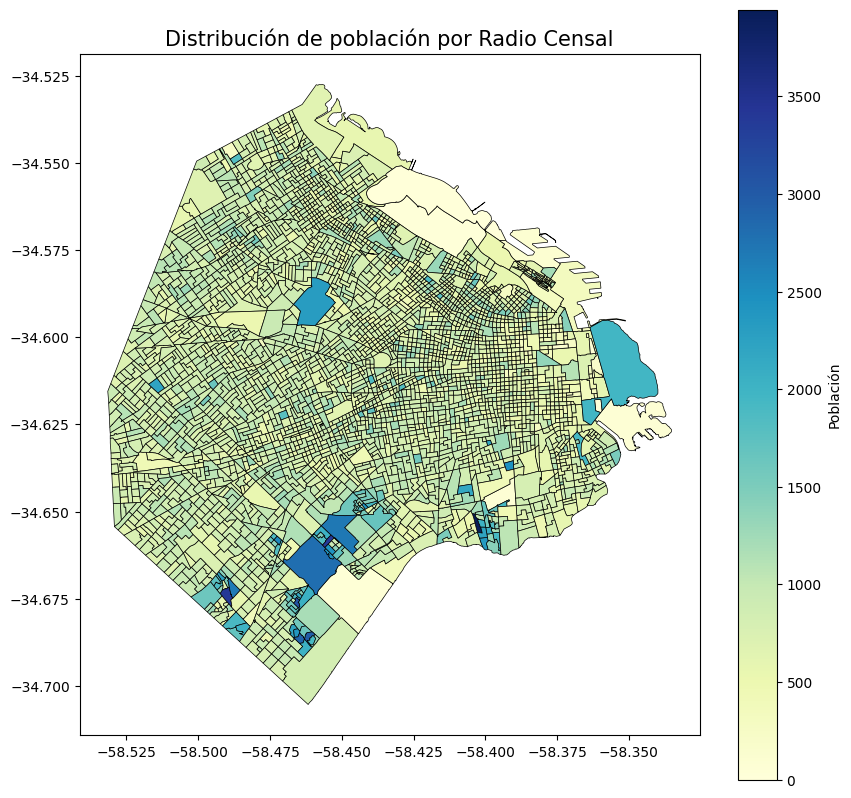

In [ ]:
import matplotlib.pyplot as plt

# Crear el gráfico
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# Graficar los radios censales coloreados por 'TOTAL_POB' y remarcar los bordes
gdf_radio_censal.plot(column='TOTAL_POB', ax=ax, legend=True,
                      cmap='YlGnBu',
                      legend_kwds={'label': "Población",
                                   'orientation': "vertical"},
                      edgecolor='black',
                      linewidth=0.5)

plt.title('Distribución de población por Radio Censal', fontsize=15)
plt.show()